# 导入包并显示样例图片

In [14]:
from img_utils import show_img # 查看图片
import os

input_dir = "images/cubemap"
# 原始图片（目录： images/cubemap）
input_images =  list(filter(lambda f: f.startswith("in_") and not f.__contains__("_6x1"), os.listdir(input_dir)))
print("原始图片：\n" , input_images)

原始图片：
 ['in_01.png', 'in_02.jpg', 'in_03.jpg', 'in_04.jpg', 'in_05.jpg', 'in_06.png', 'in_07.png', 'in_08.png', 'in_09.jpg', 'in_10.jpg', 'in_11.png', 'in_12.jpg', 'in_13.jpg', 'in_14.png']


# 查看原始图片

原始图片路径： images\cubemap\in_02.jpg


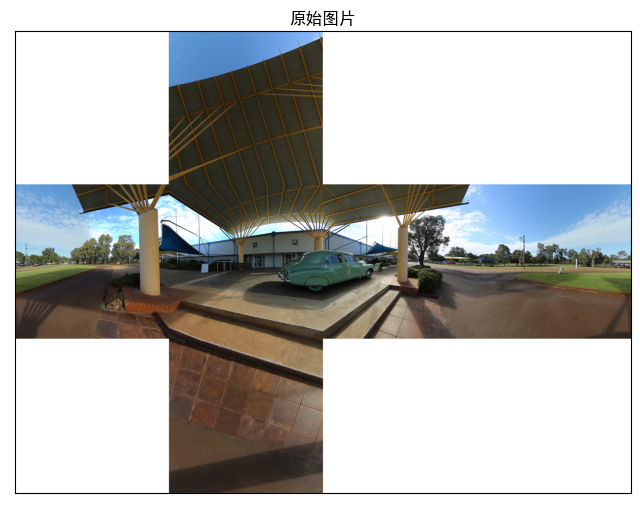

In [22]:
input_image = 'in_02.jpg'
input_image = os.path.join(input_dir, input_image)
print("原始图片路径：", os.path.normpath(input_image))
show_img(input_image, title='原始图片')

#   上
# 左前右后
#   下

show_img('images\cubemap\cubemap.png', '原理')

# 转换为 布局为 6x1 的方体贴图纹理图片

cubemap 6x1图片路径： images\cubemap\in_02_6x1.png


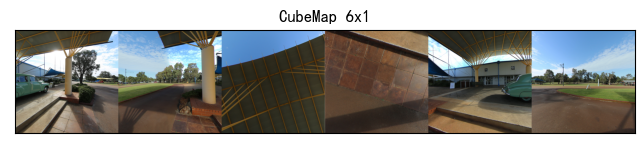

In [23]:
from panorama import conv_to_cubemap_6x1
# 转为 cubemap（立方体贴图纹理） 6x1 的布局图片
cubemap_6x1_img = conv_to_cubemap_6x1(input_image)
print("cubemap 6x1图片路径：", os.path.normpath(cubemap_6x1_img))
show_img(cubemap_6x1_img, title='CubeMap 6x1')
# 右左上下前后 -> Right Left Up Down Front Back -> rludfb 

# 制作全景图片

ffmpeg 已经下载
"G:\works\gitcode\python_oa\tools\ffmpeg\bin\ffmpeg.exe" -i "images/cubemap\in_02_6x1.png" -y -vf v360=c6x1:e:cubic:in_forder="rludfb" "output/out_panoramic.jpg"

360全景图片路径： output\out_panoramic.jpg


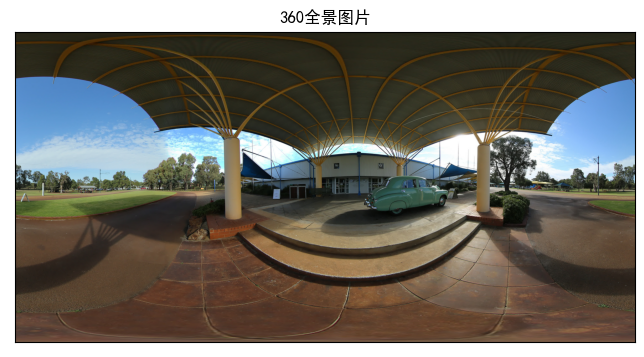

In [21]:
from panorama import cubemap_6x1_to_panorama
panoramic_image = cubemap_6x1_to_panorama(cubemap_6x1_img, 'output/out_panoramic.jpg')
print("360全景图片路径：", os.path.normpath(panoramic_image))
show_img(panoramic_image, title='360全景图片')

# 制作全景视频

In [27]:
from panorama import conv_to_panoramic_video
audio_file = "alpha.mp3"
output_mp4 =  'output/out_panoramic.mp4'
# 将一张全景图片、音频合成一个 mp4视频文件
# panoramic_image: 全景图片
# audio_file: 音频文件
# output_mp4: 输出的mp4视频文件名
# size: 输出的分辨率：
#       1K分辨率：1920x1080
#       2K分辨率：2048x1080
#       4K分辨率：4096x2160
#       8K分辨率：7680x4320
conv_to_panoramic_video(panoramic_image, audio_file, output_mp4, size="4096x2160")
print("360全景视频路径：", os.path.normpath(output_mp4))

ffmpeg 已经下载
"G:\works\gitcode\python_oa\tools\ffmpeg\bin\ffmpeg.exe"  -r 1 -i "output/out_panoramic.jpg" -i "alpha.mp3" -s 4096x2160 -pix_fmt yuvj420p -t 278 -vcodec libx264 "output/out_panoramic.mp4"

360全景视频路径： output\out_panoramic.mp4
